In [3]:
%pip install opendatasets
%pip install panda
%pip install tensorflow
%pip install keras

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=2cc36eed110770d8e9b30e1ea195a41378994581b5743e98bc8fb08b6621eaf7
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [ ]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: c0drix
Your Kaggle Key:

In [ ]:
import tensorflow as tf
from keras import *
import numpy as np
import seaborn as sns
import cv2
from sklearn.metrics import *
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Dense , GlobalAveragePooling2D , Dropout , Conv2D , MaxPooling2D , Flatten
from keras.callbacks import EarlyStopping

In [ ]:
print(tf.__version__)

In [ ]:
def get_image(path, img_size ):
    img = np.array(tf.keras.utils.load_img(
        path,
        color_mode='rgb',
        target_size = img_size,
        interpolation ='nearest',
        keep_aspect_ratio = False
    ))
    return img

In [ ]:
folder_path1 = r"/content/cell-images-for-detecting-malaria/cell_images/Parasitized"
folder_path2 = r"/content/cell-images-for-detecting-malaria/cell_images/Uninfected"
def load_images(folder_path, img_size):
    images_names = os.listdir(folder_path)
    X = np.zeros((7000, *img_size))
    for i, img_name in enumerate(images_names ):
        if i > 6999:
          break
        try:

            img_path = os.path.join(folder_path, img_name)
            img_array = get_image(img_path, img_size)
            X[i] = img_array
        except:
            X[i] = X[i - 1]
    return X / 255.0

cls1 = load_images(folder_path1, (64, 64, 3))
cls2 = load_images(folder_path2, (64, 64, 3))
cls1.shape, cls2.shape



In [ ]:
def show_images(images, labels):
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [ ]:
label1 = np.ones(len(cls1),)
label2 = np.zeros(len(cls2),)
label1.shape, label2.shape

In [ ]:
X = np.concatenate([cls1, cls2], axis = 0)
y = np.concatenate([label1, label2], axis = 0)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

show_images(X_val, y_val)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape , y_val.shape

In [ ]:
import gc
gc.collect()

29568

In [ ]:
model = Sequential([
    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    layers.MaxPooling2D(pool_size = (2, 2),  padding = 'valid'),

    layers.Conv2D(32, kernel_size = (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2),  padding = 'valid'),

    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2),  padding = 'valid'),

    layers.Conv2D(128, kernel_size = (2,2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2),  padding = 'valid'),


    layers.Conv2D(256, kernel_size = (2,2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2), padding = 'valid'),

    layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2),  padding = 'valid'),

    layers.Dropout(0.40),
    layers.Flatten(),
    layers.Dense(1, activation = 'sigmoid')
])



In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs = 50 ,validation_data=(X_val, y_val))

Epoch 1/50
298/298 [==============================] - 11s 15ms/step - loss: 0.6890 - accuracy: 0.5349 - val_loss: 0.6810 - val_accuracy: 0.5768
Epoch 2/50
298/298 [==============================] - 3s 10ms/step - loss: 0.6631 - accuracy: 0.6081 - val_loss: 0.6534 - val_accuracy: 0.6054
Epoch 3/50
298/298 [==============================] - 3s 10ms/step - loss: 0.6125 - accuracy: 0.6707 - val_loss: 0.5955 - val_accuracy: 0.7077
Epoch 4/50
298/298 [==============================] - 3s 10ms/step - loss: 0.5367 - accuracy: 0.7489 - val_loss: 0.5112 - val_accuracy: 0.7601
Epoch 5/50
298/298 [==============================] - 3s 11ms/step - loss: 0.4493 - accuracy: 0.8173 - val_loss: 0.4121 - val_accuracy: 0.8470
Epoch 6/50
298/298 [==============================] - 3s 10ms/step - loss: 0.3451 - accuracy: 0.8761 - val_loss: 0.3136 - val_accuracy: 0.8685
Epoch 7/50
298/298 [==============================] - 3s 9ms/step - loss: 0.2707 - accuracy: 0.9041 - val_loss: 0.2369 - val_accuracy: 0.9083

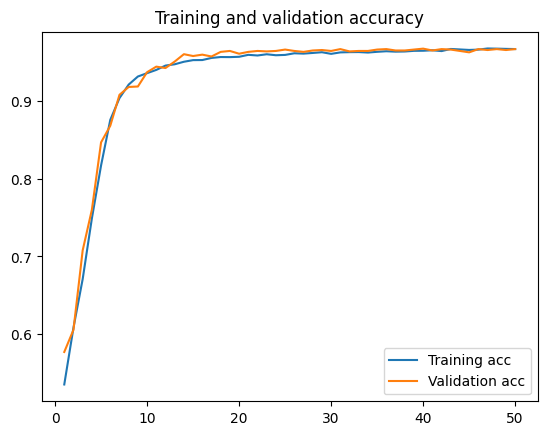

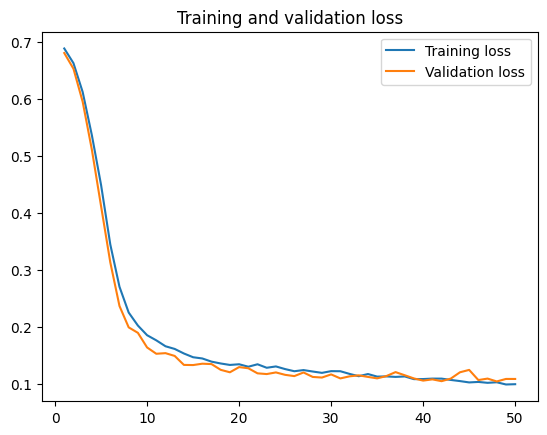

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

88/88 [==============================] - 0s 4ms/step
Confusion matrix:
F1 score: 0.9483260553129549
Precision score: 0.9745699326851159
Accuracy score: 0.9492857142857143


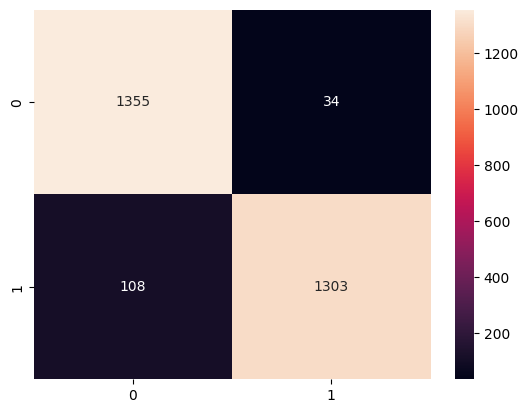

In [ ]:


from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

y_pred = model.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

cm = confusion_matrix(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print("Confusion matrix:")
print("F1 score:", f1)
print("Precision score:", precision)
print("Accuracy score:", accuracy)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.show()

In [ ]:
model.save("/content/trained_Models/CNN_scratch.h5",save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model.evaluate(X_test, y_test))

88/88 [==============================] - 1s 6ms/step - loss: 0.1503 - accuracy: 0.9479
[0.15026475489139557, 0.947857141494751]


In [ ]:
from keras.applications import MobileNet

IMG_SHAPE = (64, 64, 3)
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(64,64,3))

In [ ]:

for i in base_model.layers:
  i.trainable = False

In [1]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x = Flatten()(x)
x=Dense(512,activation='relu' , kernel_regularizer="l2")(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.40)(x)
preds=Dense(1,activation='sigmoid')(x)
model2=Model(inputs=base_model.input,outputs=preds)
base_learning_rate = 0.0001
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

NameError: name 'base_model' is not defined

In [ ]:
validation_steps=20
initial_epochs = 20

validation_batches = (X_val, y_val)
loss0,accuracy0 = model2.evaluate(X_val, y_val, steps = validation_steps)

In [ ]:
history2 = model2.fit(X_train, y_train,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

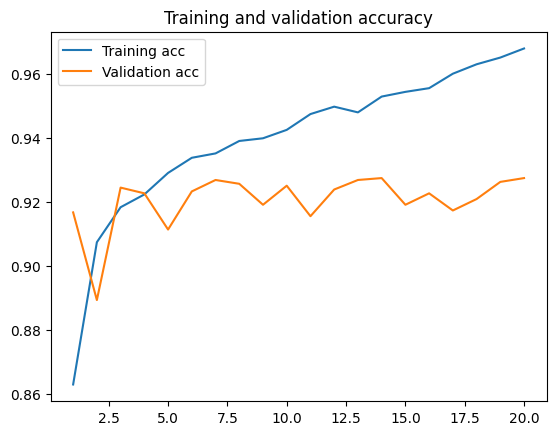

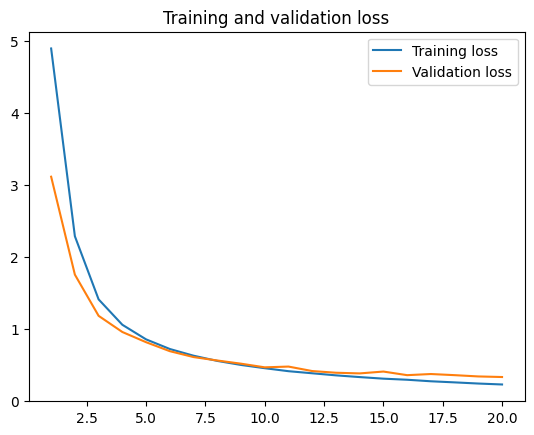

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model2.save("/content/fracture-multi-region-x-ray-data/model.h5",save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: write a code to get the condusion matrix the f1 score , prescison  , accuracy

from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

y_pred = model2.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

cm = confusion_matrix(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print("Confusion matrix:")
print("F1 score:", f1)
print("Precision score:", precision)
print("Accuracy score:", accuracy)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.show()

In [2]:
resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape = (64, 64, 3),
    input_tensor=None,
    pooling=None,
    classes=2,
    classifier_activation='sigmoid'
)

for layer in resnet.layers:
    if layer.name.startswith('conv1') or layer.name.startswith('conv2'):
        layer.trainable = False


Model3 = Sequential([
    resnet,

    layers.GlobalAveragePooling2D(),

    layers.Flatten(),

    layers.Dense(64, activation = 'relu', kernel_regularizer="l2"),
    layers.Dense(128, activation = 'relu', kernel_regularizer="l2"),
    layers.Dropout(0.60),

    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.20),

    layers.Dense(1, activation = 'sigmoid')
])
Model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000007), loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: name 'tf' is not defined

In [ ]:
validation_steps=20
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

validation_batches = (X_val, y_val)
loss0,accuracy0 = Model3.evaluate(X_val, y_val, steps = validation_steps )

20/20 [==============================] - 5s 47ms/step - loss: 3.8615 - accuracy: 0.4976


In [ ]:

history3 = Model3.fit(X_train, y_train, epochs = 25 , validation_data=validation_batches , callbacks=early_stopping)

Epoch 1/25
298/298 [==============================] - 45s 64ms/step - loss: 3.8258 - accuracy: 0.4993 - val_loss: 3.7245 - val_accuracy: 0.4976
Epoch 2/25
298/298 [==============================] - 17s 57ms/step - loss: 3.6529 - accuracy: 0.4993 - val_loss: 3.4924 - val_accuracy: 0.4976
Epoch 3/25
298/298 [==============================] - 16s 54ms/step - loss: 3.4913 - accuracy: 0.5064 - val_loss: 3.3642 - val_accuracy: 0.5232
Epoch 4/25
298/298 [==============================] - 17s 56ms/step - loss: 3.3602 - accuracy: 0.5412 - val_loss: 3.2703 - val_accuracy: 0.6095
Epoch 5/25
298/298 [==============================] - 16s 55ms/step - loss: 3.2467 - accuracy: 0.5872 - val_loss: 3.1759 - val_accuracy: 0.7101
Epoch 6/25
298/298 [==============================] - 17s 56ms/step - loss: 3.1366 - accuracy: 0.6495 - val_loss: 3.0776 - val_accuracy: 0.6792
Epoch 7/25
298/298 [==============================] - 16s 55ms/step - loss: 3.0290 - accuracy: 0.6966 - val_loss: 2.9687 - val_accuracy:

88/88 [==============================] - 2s 18ms/step - loss: 1.4882 - accuracy: 0.9300
[1.4881572723388672, 0.9300000071525574]


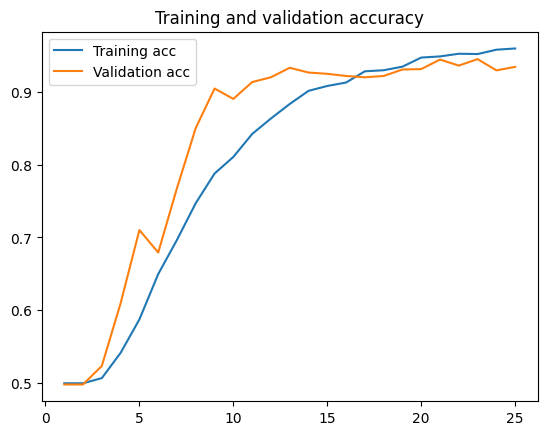

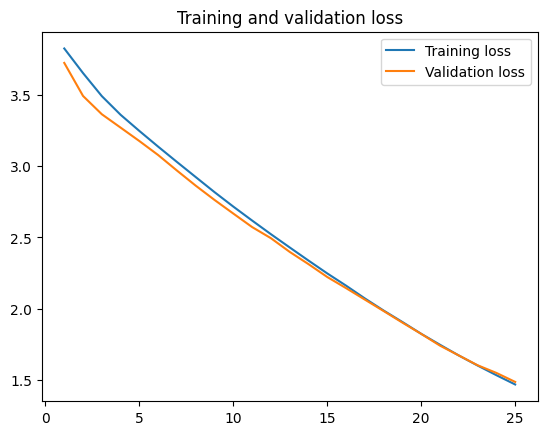

In [ ]:
print(Model3.evaluate(X_test, y_test))

import matplotlib.pyplot as plt

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

88/88 [==============================] - 2s 14ms/step
Confusion matrix:
F1 score: 0.9309859154929577
Precision score: 0.9251224632610217
Accuracy score: 0.93


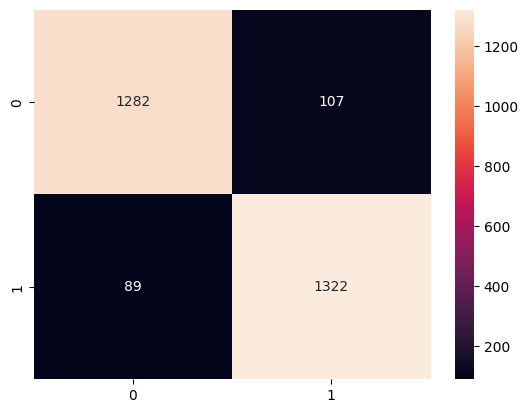

In [ ]:


from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

y_pred = Model3.predict(X_test)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

cm = confusion_matrix(y_test, y_pred_binary)

f1 = f1_score(y_test, y_pred_binary)

precision = precision_score(y_test, y_pred_binary)

accuracy = accuracy_score(y_test, y_pred_binary)

print("Confusion matrix:")
print("F1 score:", f1)
print("Precision score:", precision)
print("Accuracy score:", accuracy)
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.show()

In [ ]:
Model3.save("/content/trained_Models/ResNet50.h5",save_format='h5')